## Heart Disease Framingham dataset

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. 

#### Features (Variables)

* Sex: male or female(Nominal)
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: no further information provided
* Current Smoker: whether or not the patient is a current smoker (Nominal)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

#### Target variable to predict
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)


In [1]:
# load the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Load the dataset

In [2]:
data=pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
data.head(3)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [3]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
# Explore different features
for col in data:
    print(col, ":" ,data[col].unique())

male : [1 0]
age : [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
education : [ 4.  2.  1.  3. nan]
currentSmoker : [0 1]
cigsPerDay : [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BPMeds : [ 0.  1. nan]
prevalentStroke : [0 1]
prevalentHyp : [0 1]
diabetes : [0 1]
totChol : [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269.
 275. 268. 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246.
 150. 187. 286. 154. 279. 293. 259. 219. 230. 320. 312. 165. 159. 174.
 242. 301. 167. 308. 325. 229. 236. 224. 253. 464. 171. 186. 

In [5]:
# we remove the education colomn since it is subjective in the context
data=data.drop(['education'],axis=1)

In [6]:
# fill na with 0s
data["cigsPerDay"] = data["cigsPerDay"].fillna(0)
data["BPMeds"] = data["BPMeds"].fillna(0)

In [7]:
# check for other missing value propotions
(data.isnull().sum() / len(data)).sort_values(ascending=False)

glucose            0.091553
totChol            0.011798
BMI                0.004483
heartRate          0.000236
male               0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.000000
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

### Exploratory Data Analysis

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>],
       [<AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>, <AxesSubplot:>]],
      dtype=object)

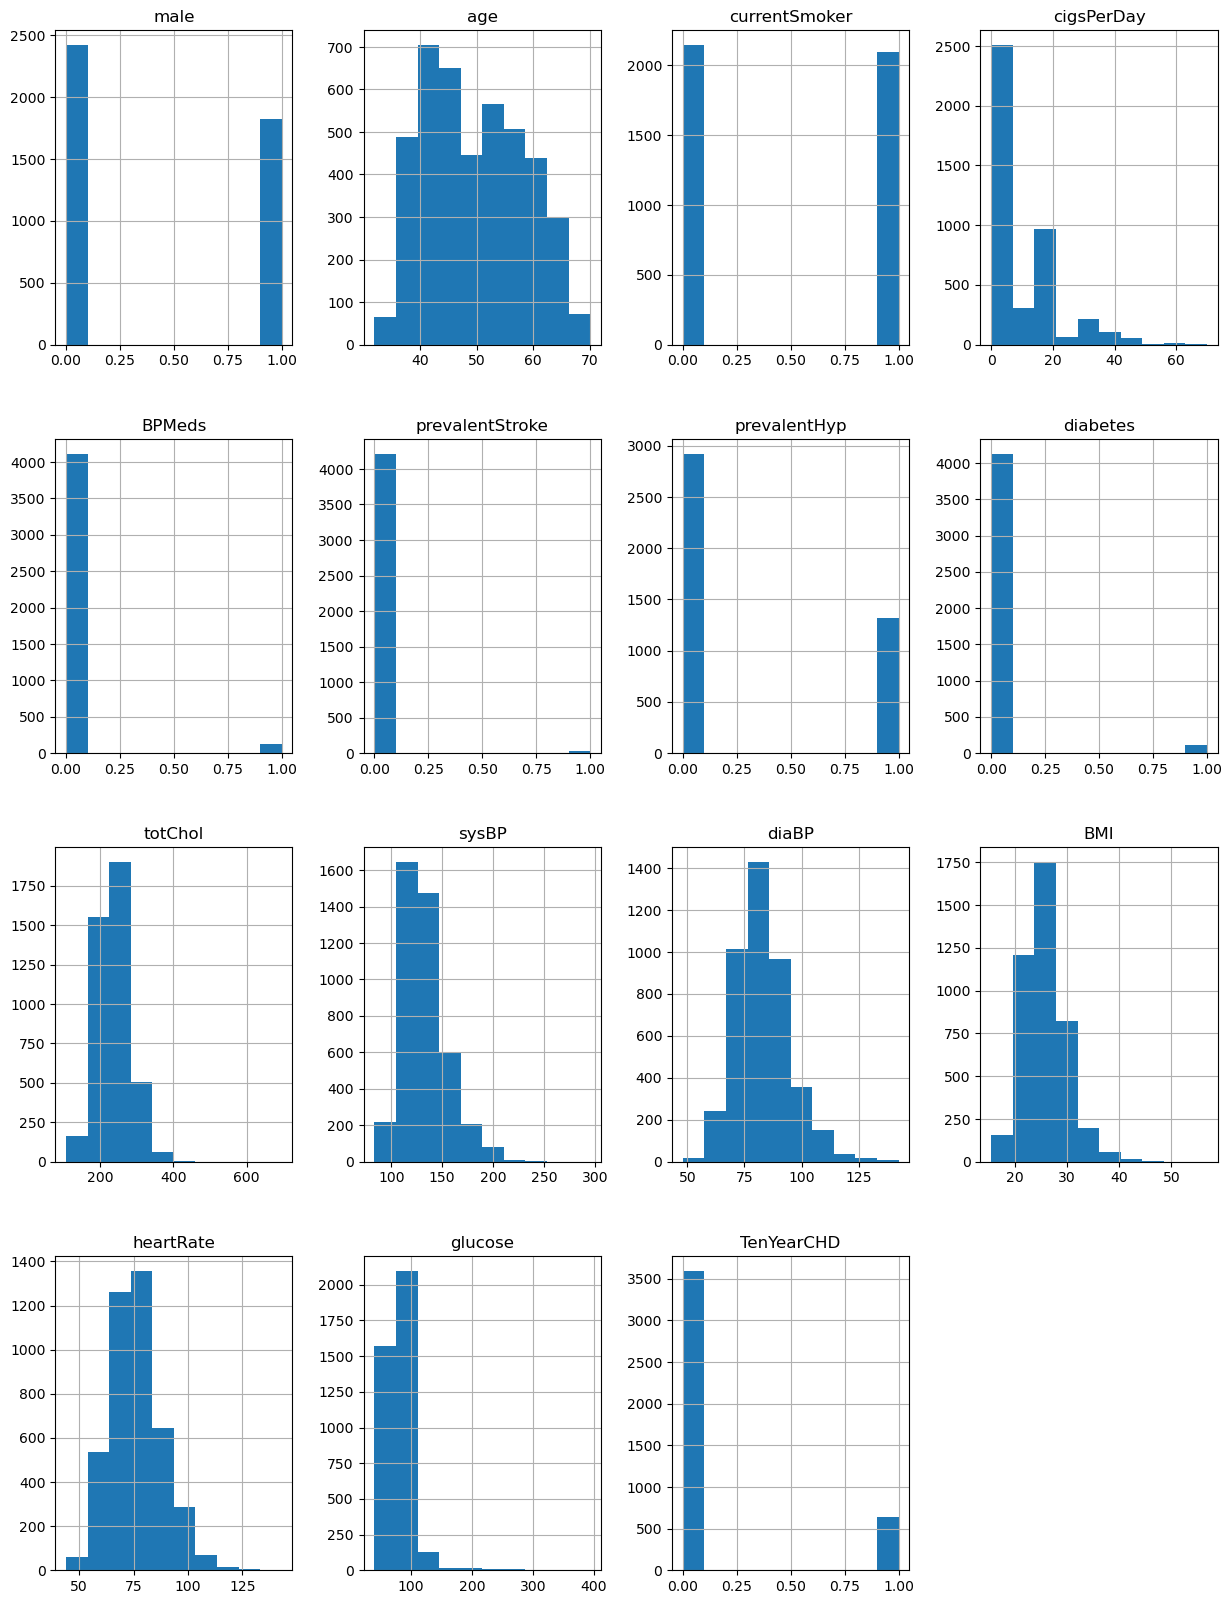

In [8]:
# Distribution of each feature, Univariate analysis
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

In [9]:
# drop the rows that contains missing values
data_df=data.dropna()
# data_df.isnull().sum()

#### Correlation analysis

Correlation between the predictors and the target varialbe.

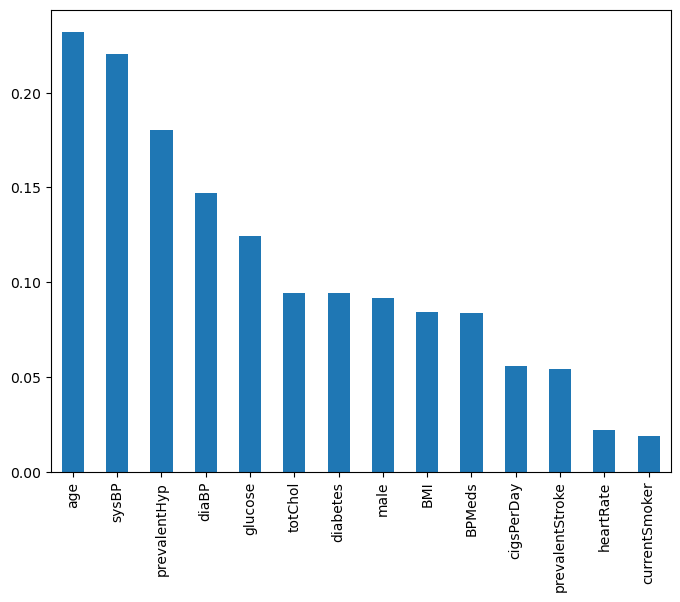

In [10]:
corr_with_tot_count = data_df.corr()["TenYearCHD"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
corr_with_tot_count.drop("TenYearCHD").plot.bar()
plt.show()

In [11]:
corr_with_tot_count

TenYearCHD         1.000000
age                0.232279
sysBP              0.220388
prevalentHyp       0.180033
diaBP              0.147295
glucose            0.124164
totChol            0.094309
diabetes           0.094210
male               0.091545
BMI                0.084007
BPMeds             0.083571
cigsPerDay         0.055659
prevalentStroke    0.054128
heartRate          0.021736
currentSmoker      0.018786
Name: TenYearCHD, dtype: float64

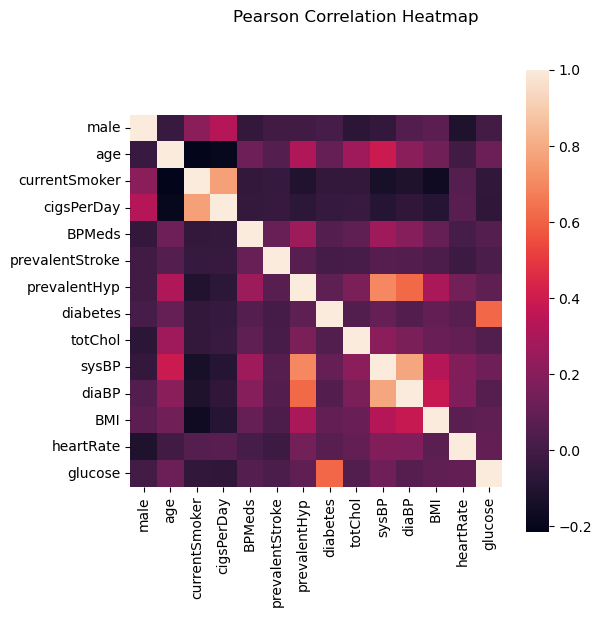

In [12]:
# Check for correlation with the Numeric features

pd.set_option('precision',2)
plt.figure(figsize=(6,6))

sns.heatmap(data_df.drop(['TenYearCHD'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

In [13]:
# Create correlation matrix
corr_matrix = data_df.drop(['TenYearCHD'],axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# select one feature from the highly correlated features, threshold 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

print(to_drop)

# drop the selected feattures that are correlated with anothoer feature
#data_df.drop(to_drop, axis=1, inplace=True)

['cigsPerDay', 'diaBP']


#### MultiCollinearity

In [14]:
def cal_VIF(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] =  X.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))] 
    return vif_data
    
cal_VIF(data_df.drop(['TenYearCHD'],axis=1))

,feature,VIF
0,male,2.15
1,age,40.59
2,currentSmoker,4.77
3,cigsPerDay,4.09
4,BPMeds,1.14
5,prevalentStroke,1.02
6,prevalentHyp,2.37
7,diabetes,1.59
8,totChol,30.86
9,sysBP,138.61


In [15]:

sel_feat_df = data_df[['age', 'sysBP', 'prevalentHyp', 'diaBP', 'glucose' ]]
cal_VIF(sel_feat_df)

,feature,VIF
0,age,33.89
1,sysBP,132.73
2,prevalentHyp,2.02
3,diaBP,101.12
4,glucose,12.41


In [16]:
data_df.values

array([[  1.,  39.,   0., ...,  80.,  77.,   0.],
       [  0.,  46.,   0., ...,  95.,  76.,   0.],
       [  1.,  48.,   1., ...,  75.,  70.,   0.],
       ...,
       [  1.,  51.,   1., ...,  65.,  68.,   0.],
       [  0.,  48.,   1., ...,  84.,  86.,   0.],
       [  0.,  52.,   0., ...,  80., 107.,   0.]])

### Logistic Regression Model

In [17]:
def model_training(training_data,testing_data):
    
    x_train, x_test, y_train, y_test = train_test_split(training_data,testing_data,train_size = 0.7,random_state=3)

    model = LogisticRegression(random_state=0).fit(x_train, y_train)

    y_pred = model.predict(x_test)
    
    return model, y_pred, y_test, x_test


In [18]:
def model_performance(model, y_test, x_test, y_pred):
    
    print("Classification report")
    
    print(classification_report(y_test,y_pred))
    
    
    cnf_matrix_log = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix Logistic Regression\n', y=1.1)
    
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    

In [19]:
# Train the model with the initial selected features
training_data= data_df.values
testing_data= data_df['TenYearCHD'].values

model, y_pred, y_test, x_test = model_training(training_data,testing_data)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       179

    accuracy                           1.00      1148
   macro avg       1.00      1.00      1.00      1148
weighted avg       1.00      1.00      1.00      1148



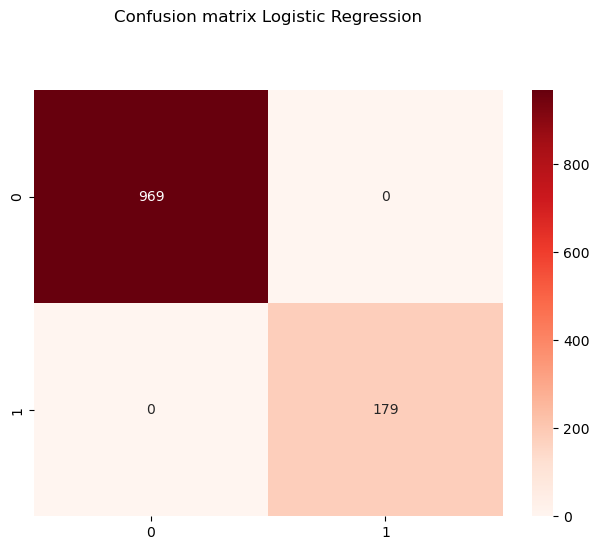

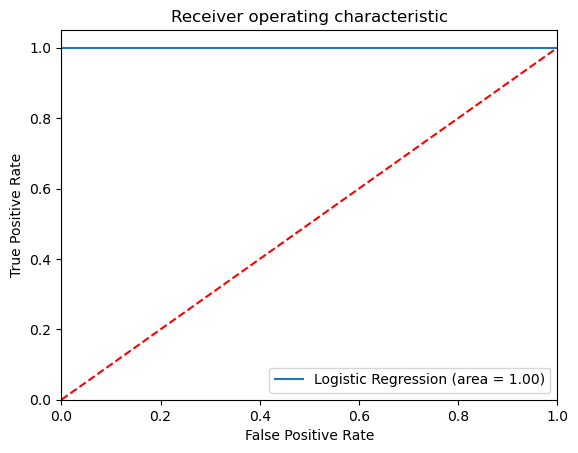

In [20]:
model_performance(model, y_test, x_test, y_pred)

In [21]:
# train the model with features selected using VIF
training_data= sel_feat_df.values
testing_data= data_df['TenYearCHD'].values

model, y_pred, y_test, x_test = model_training(training_data,testing_data)

Classification report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       969
           1       0.67      0.06      0.10       179

    accuracy                           0.85      1148
   macro avg       0.76      0.53      0.51      1148
weighted avg       0.82      0.85      0.79      1148



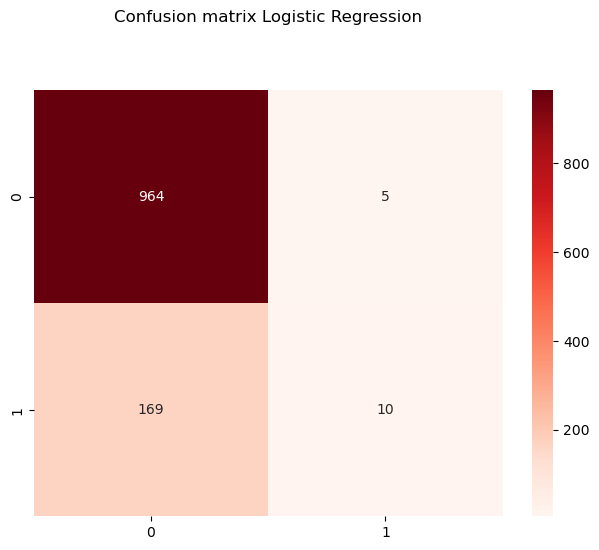

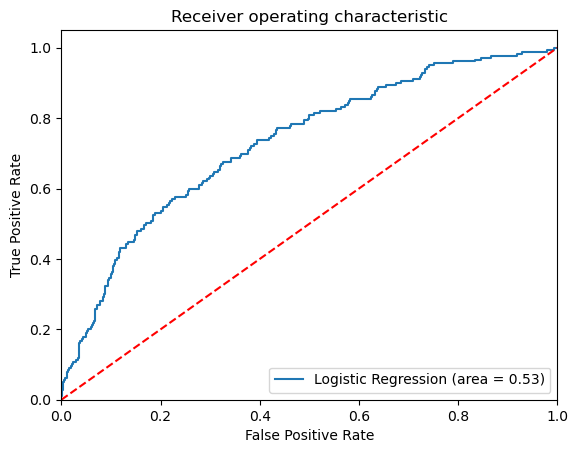

In [22]:
model_performance(model, y_test, x_test, y_pred)